## Example A. Facility Location on MNIST and Fashion-MNIST

Our first example will be a simple application of the facility location function to the MNIST and Fashion-MNIST data sets. These data sets are small images of numbers or articles of clothing, respectively. 

In [1]:
import matplotlib
matplotlib.use('pdf')

%pylab inline

import seaborn; seaborn.set_style('whitegrid')

from keras.datasets import mnist
from keras.datasets import fashion_mnist

from sklearn.metrics import pairwise_distances

from umap import UMAP
from apricot import FacilityLocationSelection

Populating the interactive namespace from numpy and matplotlib


Using Theano backend.


In [10]:
X_fashion = fashion_mnist.load_data()[0][0][::10]
X_fashion = X_fashion.reshape(X_fashion.shape[0], 28*28)

X_fashion_pairwise = pairwise_distances(X_fashion, metric="euclidean", squared=True)

In [11]:
X_fashion_umap = UMAP(metric="precomputed").fit_transform(X_fashion_pairwise)

/home/jmschr/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


In [12]:
model_fashion = FacilityLocationSelection(10, 'precomputed', verbose=True)
model_fashion.fit(X_fashion_pairwise.max() - X_fashion_pairwise)

100%|██████████| 10.0/10.0 [00:00<00:00, 68.0it/s]


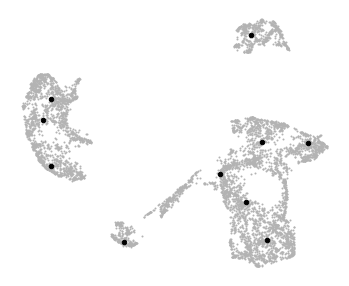

In [13]:
plt.figure(figsize=(6, 5))
plt.scatter(X_fashion_umap[:,0], X_fashion_umap[:,1], s=1, color="0.7")
plt.scatter(X_fashion_umap[model_fashion.ranking, 0], X_fashion_umap[model_fashion.ranking, 1], s=20, color="k")
plt.axis("off")
plt.show()

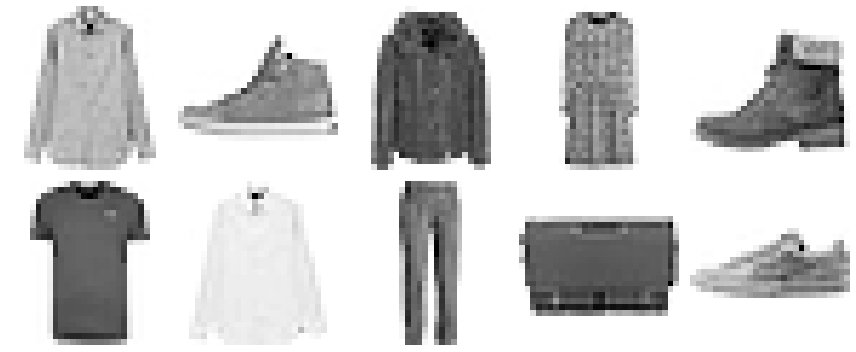

In [14]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_fashion[model_fashion.ranking[i]].reshape(28, 28), aspect='auto', cmap='Greys')
    plt.axis("off")
    
plt.tight_layout()
plt.savefig("fashion-img.pdf")
plt.show()

In [15]:
X_digit = mnist.load_data()[0][0][::10]
X_digit = X_digit.reshape(X_digit.shape[0], 28*28)

X_digit_pairwise = pairwise_distances(X_digit, metric="euclidean", squared=True)

X_digit_umap = UMAP(metric="precomputed").fit_transform(X_digit_pairwise)

model_digit = FacilityLocationSelection(10, 'precomputed', verbose=True)
model_digit.fit(X_digit_pairwise.max() - X_digit_pairwise)

/home/jmschr/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"
100%|██████████| 10.0/10.0 [00:00<00:00, 72.4it/s]


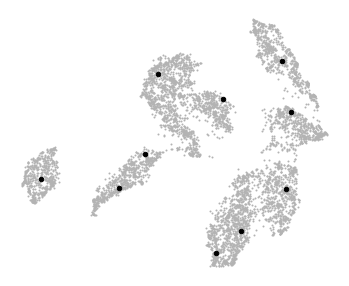

In [16]:
plt.figure(figsize=(6, 5))
plt.scatter(X_digit_umap[:,0], X_digit_umap[:,1], s=1, color="0.7")
plt.scatter(X_digit_umap[model_digit.ranking, 0], X_digit_umap[model_digit.ranking, 1], s=20, color='k')
plt.axis("off")
plt.show()

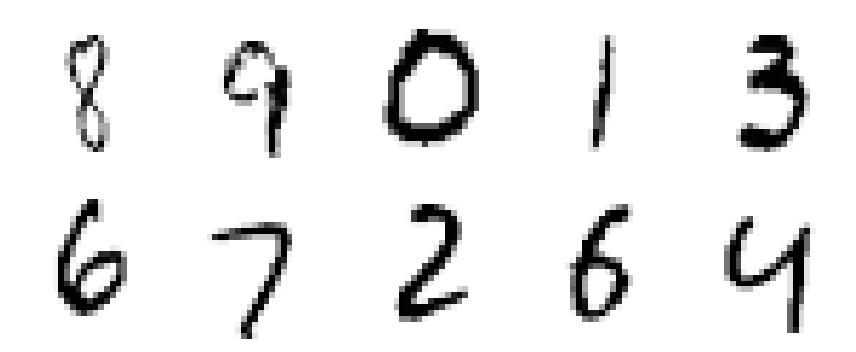

In [18]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_digit[model_digit.ranking[i]].reshape(28, 28), aspect='auto', cmap='Greys')
    plt.axis("off")
    
plt.tight_layout()
plt.savefig("digits-img.pdf")
plt.show()

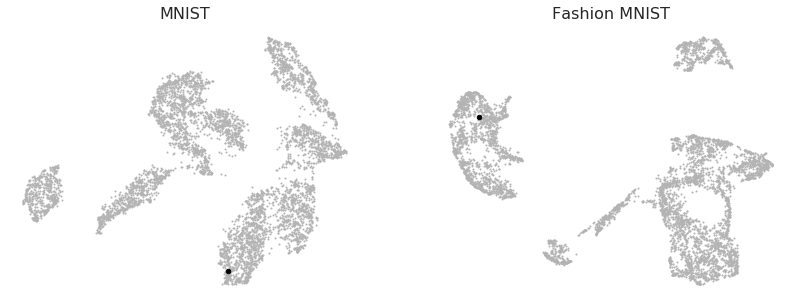

In [33]:
i = 9

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.title("MNIST", fontsize=16)
plt.scatter(X_digit_umap[:,0], X_digit_umap[:,1], s=1, color="0.7")
plt.scatter(X_digit_umap[model_digit.ranking[i:i+1], 0], X_digit_umap[model_digit.ranking[i:i+1], 1], s=20, color='k')
plt.axis("off")

plt.subplot(122)
plt.title("Fashion MNIST", fontsize=16)
plt.scatter(X_fashion_umap[:,0], X_fashion_umap[:,1], s=1, color="0.7")
plt.scatter(X_fashion_umap[model_fashion.ranking[i:i+1], 0], X_fashion_umap[model_fashion.ranking[i:i+1], 1], s=20, color='k')
plt.axis("off")

#plt.savefig("embeddings.png")
plt.show()

# ML

In [2]:
(X_fashion_train, y_fashion_train), (X_fashion_test, y_fashion_test) = fashion_mnist.load_data()

X_fashion_train = X_fashion_train.reshape(X_fashion_train.shape[0], 28*28)
X_fashion_test = X_fashion_test.reshape(X_fashion_test.shape[0], 28*28)

X_fashion_apricot, y_fashion_apricot = FacilityLocationSelection(60000, verbose=True).fit_transform(X_fashion_train, y_fashion_train)

100%|██████████| 60.0k/60.0k [01:55<00:00, 519it/s]   


In [3]:
from sklearn.linear_model import LogisticRegression

ns = [10, 20, 50, 100, 200, 500, 1000, 2000]

accs_apricot, accs_random = [], []

for n in ns:
    model = LogisticRegression(max_iter=10000).fit(X_fashion_apricot[:n], y_fashion_apricot[:n])
    y_hat = model.predict(X_fashion_test)
    acc_apricot = (y_hat == y_fashion_test).mean()
    accs_apricot.append(acc_apricot)
    
    accs_random_ = []
    for i in range(20):
        idxs = numpy.arange(X_fashion_train.shape[0])
        
        numpy.random.seed(i)
        numpy.random.shuffle(idxs)
        
        X_fashion_random = X_fashion_train[idxs]
        y_fashion_random = y_fashion_train[idxs]
        
        model = LogisticRegression(max_iter=10000).fit(X_fashion_random[:n], y_fashion_random[:n])
        y_hat = model.predict(X_fashion_test)
        acc_random = (y_hat == y_fashion_test).mean()
        accs_random_.append(acc_random)
    
    accs_random.append(accs_random_)
    
    print(n, numpy.mean(acc_random), acc_apricot)

10 0.4649 0.5374
20 0.5393 0.5382
50 0.6388 0.6445
100 0.6949 0.6925
200 0.7334 0.7402
500 0.7465 0.7588
1000 0.7612 0.764
2000 0.7614 0.7642


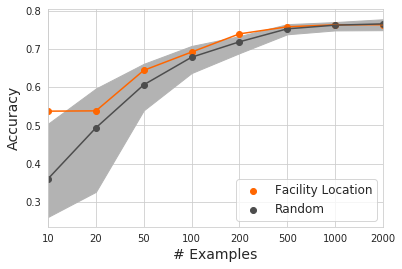

In [6]:
plt.plot(accs_apricot, color='#FF6600')
plt.plot(numpy.mean(accs_random, axis=1), color='0.3')

plt.fill_between(range(len(ns)), numpy.min(accs_random, axis=1), numpy.max(accs_random, axis=1), color='0.7')

plt.scatter(range(len(ns)), accs_apricot, color='#FF6600', label="Facility Location")
plt.scatter(range(len(ns)), numpy.mean(accs_random, axis=1), color='0.3', label="Random")
plt.xticks(range(len(ns)), ns)
plt.xlim(0, len(ns)-1)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("# Examples", fontsize=14)
plt.legend(fontsize=12, loc=4)

plt.savefig("fashion-ml.pdf")
plt.show()

#### digits

In [7]:
(X_digits_train, y_digits_train), (X_digits_test, y_digits_test) = mnist.load_data()

X_digits_train = X_digits_train.reshape(X_digits_train.shape[0], 28*28)
X_digits_test = X_digits_test.reshape(X_digits_test.shape[0], 28*28)

X_digits_apricot, y_digits_apricot = FacilityLocationSelection(60000, verbose=True).fit_transform(X_digits_train, y_digits_train)

100%|██████████| 60.0k/60.0k [02:25<00:00, 412it/s]   


In [8]:
from sklearn.linear_model import LogisticRegression

ns = [10, 20, 50, 100, 200, 500, 1000, 2000]

accs_apricot, accs_random = [], []

for n in ns:
    model = LogisticRegression(max_iter=10000).fit(X_digits_apricot[:n], y_digits_apricot[:n])
    y_hat = model.predict(X_digits_test)
    acc_apricot = (y_hat == y_digits_test).mean()
    accs_apricot.append(acc_apricot)
    
    accs_random_ = []
    for i in range(20):
        idxs = numpy.arange(X_digits_train.shape[0])
        
        numpy.random.seed(i)
        numpy.random.shuffle(idxs)
        
        X_digits_random = X_digits_train[idxs]
        y_digits_random = y_digits_train[idxs]
        
        model = LogisticRegression(max_iter=10000).fit(X_digits_random[:n], y_digits_random[:n])
        y_hat = model.predict(X_digits_test)
        acc_random = (y_hat == y_digits_test).mean()
        accs_random_.append(acc_random)
    
    accs_random.append(accs_random_)
    
    print(n, numpy.mean(acc_random), acc_apricot)

10 0.33 0.5036
20 0.4941 0.6196
50 0.6478 0.7679
100 0.7609 0.8184
200 0.8045 0.8472
500 0.8355 0.8753
1000 0.8615 0.8837
2000 0.869 0.884


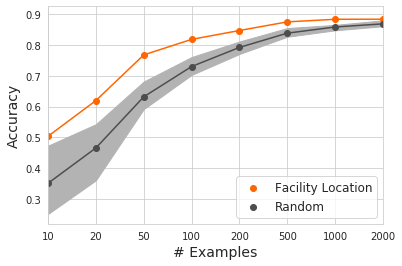

In [34]:
plt.plot(accs_apricot, color='#FF6600')
plt.plot(numpy.mean(accs_random, axis=1), color='0.3')

plt.fill_between(range(len(ns)), numpy.min(accs_random, axis=1), numpy.max(accs_random, axis=1), color='0.7')

plt.scatter(range(len(ns)), accs_apricot, color='#FF6600', label="Facility Location")
plt.scatter(range(len(ns)), numpy.mean(accs_random, axis=1), color='0.3', label="Random")

plt.xticks(range(len(ns)), ns)
plt.xlim(0, len(ns)-1)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("# Examples", fontsize=14)
plt.legend(fontsize=12, loc=4)

plt.savefig("digits-ml.pdf")
plt.show()